In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

# Dungeons and Data

A scientific approach to stupid questions that dice rollers care about.  I'll avoid using libraries like pandas or numpy to keed the code readable to non-scientists.

### Attack Bonus vs Damage Bonus

Having played for several years since the release of 3rd edition I find myself playing a 5th edition campaign as a ranger.  Rangers must choose a fighting style and I was torn between choosing archery and and dueling.  Archery grants a +2 bonus to attacks with ranged weapons and dueling grants a +2 bonus to damage when fighting with a single melee weapon.  Since attacks and damage are two complementary parts of killing enemies, I thought I'd take a look into which was the better choice.  
Additionally, when playing with feats (which are a variant in 5th edition!  The horror!  The horror!), the Sharpshooter feat allows a ranger (anyone, really) to take a -5 penalty to attack in order to gain a +10 bonus to damage, so we'll also look at this to determine which is the right answer.  The Sharpshooter feat also allows the archer to ignore cover to an extent, so we'lle examine how valuable that is.  Finally, we'll compare the value of the feat to the +2 bonus to a stat the ranger would have had if he'd chosen to forsake the (variant!) feat.

To determine the worth of an ability we need a way to measure it.  I'll use the Expected Value($E$) for this purpose.  Abtractly, the expected value of a given attack is how much damage we can expect to inflict with it in general (note that I avoid the word _average_ because it has specific statistical meaning).  Think of this value as the center of mass of an object; while there might not even be any actual mass at the center of mass, it is a comparable and objective means of representing something.  We will calculate the expected value of an attack thus:

$$E(attack) = Pr(hit) \cdot E(damage)$$

That is, the expected value of an attack is equal to the probability the attack hits multiplied by the expected value of the damage we'd inflict on a successful attack.  More specifically:

$$E(attack) = Pr(attackroll >= AC) \cdot E(damage)$$

To veteran players, it's obvious that the likelihood of a hit is dependent on the armor class (AC) of the target, but here we make it mathematically explicit.  We'll have to calculate the expected value of an attack against different ACs.  Once we do that, we can investigate further.

Veteran players may skip this paragraph.  An attack is calculated by rolling a single twenty-sided die (1d20, where 1 is the number of dice and 20 is the number of sides), adding bonuses and penalties, and comparing it to the armor class of the target).  Then damage is rolled in a similar fashion but without comparison; the damage is simply dealt (though tougher monsters can reduce damage).  Focusing now just on the attack roll:

$$Pr(hit) = Pr(attackroll + \sum bonuses - \sum penalties >= ac)$$



We'll start by calculating the probability that the attack roll beats the armor class ($Pr(attackroll + \Sigma bonuses - \Sigma penalties >= ac)$).  We'll start with an index ac to simplify the process for now: AC 15.  We'll also assume the only bonus to attack is the first level proficiency bonus: +2.  1d20 + 2 hits and ac of 15 on 7 faces of the die: 13, 14, 15, 16, 17, 18, 19, and 20 (we'll consider critical hits later).  That means the probability of a hit is 7/20.

$$Pr(1d20 + 2 >= 15) = 7/20$$

In [9]:
7/20

0.35

So with a +2 bonus to attack against an ac of 15, we can expect to hit 35% of our attacks.

Rangers have traditionally trod either the path of the archer or the dual-wielder.  My ranger is an archer, so that's all I care about here, so we'll consider the damage of a longbow, 1d8.  The expected damage is easy to calculate: it's simply the sum of the possible results times their probabilities:

$$\sum_{i=1}^{n}side_n \cdot Pr(n)$$

Since each side has equal probability (on a fair die), however, we can reduce it to a simple mean:

$$\frac{1}{N}\sum_{i=1}^{n}side_n$$

In [1]:
sum([1,2,3,4,5,6,7,8])/8

4.5

Incidentally, an easy trick with (fair) dice is to add the highest number and the lowest number and average them:

In [5]:
sum([1,8])/2

4.5

So we have our expected damage and our probability of a hit.  Let's see what we get:

$$E(attack) = Pr(hit) \cdot E(damage)$$
$$E(attack) = 7/20 \cdot 4.5$$



In [7]:
7/20 * 4.5

1.575

So in aggregate, we can expect to deal 1.575 damage with an attack.  Remember, this accounts for the likelihood of a hit and the variance in damage rolls.  If you miss, you miss, you don't just get to deal 1.575 damage.  This is a representative number that allows us to compare the value of attacks.

How do these bonuses apply?  Let's look at how the +2 attack bonus when choosing the archery style.  We simply add 2 to our attack roll; it's another bonus.

$$Pr(hit) = Pr(attackroll + \sum bonuses - \sum penalties >= ac)$$

$$Pr(hit) = Pr(attackroll + proficiency + specialization >= ac)$$

$$Pr(hit) = Pr(attackroll + 2 + 2 >= 15)$$

$$Pr(hit) = 9/20$$

...and how that impacts the expected value of the attack:

$$E(attack) = Pr(attackroll + \sum bonuses - \sum penalties >= ac) \cdot E(damage)$$

$$E(attack) = 9/20 \cdot 4.5$$




In [10]:
9/20 * 4.5

2.025

A significant increase!  Let's modify our equation to account for bonuses to damage:

$$E(damage) = \frac{1}{N}\sum_{i=1}^{n}side_n + \sum_{i=1}^{k}bonus_k$$

$$E(attack) = Pr(attackroll + \sum bonuses - \sum penalties >= ac) \cdot (\frac{1}{N}\sum_{i=1}^{n}side_n + \sum bonus)$$

...and plug in the numbers (without the attack bonus, with the damage bonus):

$$E(attack) = 7/20 \cdot (4.5 + 2)$$

In [12]:
7/20 * (4.5 + 2)

2.275

aaaaHA!  Even higher!  So given our main parameter, AC = 15 (the standard attack bonus of 2 applies in both cases so it doesn't affect the result), we see that a +2 damage bonus is better than a +2 attack bonus.  How much better is it?  We compare the ratio of differences:

$$\frac{E(attack_{attackbonus}) - E(attack_{nobonus}))}{E(attack_{damagebonus}) - E(attack_{nobonus}))}$$

$$\frac{2.025 - 1.575}{2.275 - 1.575}$$

In [36]:
(2.025 - 1.575)/(2.275 - 1.575)

0.6428571428571428

So the incease in expected value of an attack with bolstered attack bonus is only 65% as good as a similar increase in damage.  Seems pretty clear, but remember that this equation is dependent on the AC of the target.  We'll have to account for that.  We'll look at this comparison at AC 10 (in case you fight a goat) through 25 (in case you fight the Terrasque, which, good luck with that)

In [26]:
def prHit(attack_bonus, AC):
    #assume d20
    pr = (20 - AC + attack_bonus)/20
    
    if pr <=0:
        #if the difference between the AC and bonus is more than 20
        #only crits will hit
        #if we don't define a floor we'll get negative probability to hit
        return 1/20
    return pr

print(prHit(2, 15) == .35)
print(prHit(0, 20) == 1/20)
print(prHit(0, 21) == 1/20)
print(prHit(0, 200) == 1/20)

True
True
True
True


In [33]:
ACs = range(10, 26)
e_damage_bonus = []
e_attack_bonus = []
e_no_bonus = []
for AC in ACs:
    #Attack bonuses: +2 proficiency bonus (the minimum) and +2 bonus from archery specialization
    #No damage bonus
    e_attack_bonus.append(prHit(2+2, AC) * 4.5)
    #Attack bonuses: +2 proficiency bonus (the minimum)
    #Damage bonus: +2 from melee specialization
    e_damage_bonus.append(prHit(2, AC) * (4.5 + 2))
    #No attack bonus
    #No damage bonus
    e_no_bonus.append(prHit(2, AC) * 4.5)

In [34]:
print(e_damage_bonus)
print(e_attack_bonus)
print(e_no_bonus)

[3.9, 3.575, 3.25, 2.9250000000000003, 2.6, 2.275, 1.95, 1.625, 1.3, 0.975, 0.65, 0.325, 0.325, 0.325, 0.325, 0.325]
[3.15, 2.9250000000000003, 2.6999999999999997, 2.475, 2.25, 2.025, 1.8, 1.575, 1.3499999999999999, 1.125, 0.9, 0.6749999999999999, 0.45, 0.225, 0.225, 0.225]
[2.6999999999999997, 2.475, 2.25, 2.025, 1.8, 1.575, 1.3499999999999999, 1.125, 0.9, 0.6749999999999999, 0.45, 0.225, 0.225, 0.225, 0.225, 0.225]


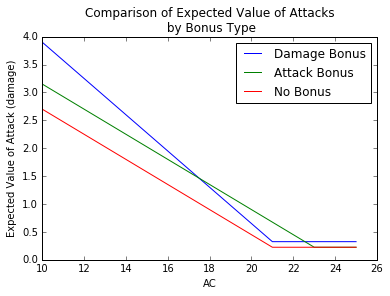

In [35]:
plt.plot(ACs, e_damage_bonus, label = "Damage Bonus")
plt.plot(ACs, e_attack_bonus, label = "Attack Bonus")
plt.plot(ACs, e_no_bonus, label = "No Bonus")
plt.legend()
plt.title("Comparison of Expected Value of Attacks\n by Bonus Type")
plt.xlabel("AC")
plt.ylabel("Expected Value of Attack (damage)")

There are two break-even points: one at AC=18 and another at AC=23.  Against AC<18 it's better to have the damage bonus.  Against 18 <= AC < 23, the attack damage is better.  Against AC >= 23, the damage bonus is better.  Notice that at AC=23 the attack bonus doesn't actually help you because the AC is so high that you need a crit to hit the target because if you roll a 20, 20 + 2 = 22, so the only reason you hit it is because of the automatic hit from the natural 20.  Because of this, the damage bonus will always outperform the attack bonus because as long as the $Pr(hit)>0$, a damage bonus will always increase the expected value of the attack.

Let's look at the comparison another way using our comparison from before.  How much better is one than the other?

In [46]:
relative_value = []
for dBonus, aBonus, nBonus in zip(e_damage_bonus, e_attack_bonus, e_no_bonus):
    relative_value.append((aBonus - nBonus)/(dBonus - nBonus))

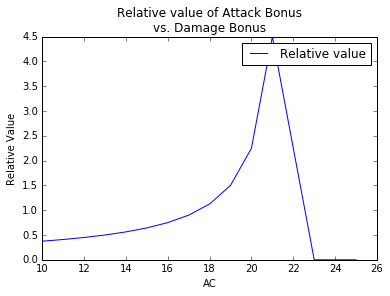

In [47]:
plt.plot(ACs, relative_value, label = "Relative value")
plt.legend()
plt.title("Relative value of Attack Bonus\nvs. Damage Bonus")
plt.xlabel("AC")
plt.ylabel("Relative Value")

This is a strange chart.  When the blue line equals 1 the two bonuses give equal expected value, and since the ratio is attack_bonus:damage_bonus, a value below 1 indicates that the attack bonus has less value.  This matches our interpretation of the above chart: the attack bonus underperforms the damage bonus until AC 18, starting out at less than half the value, until it reaches parity at AC=18 and shoots waaaay up to 4.5 times the value at AC=21.  After that bonuses don't help much because of the ceiling placed on attack rolls by the number of sides of the dice, but the ACs are tuned around that to begin with.  

I chose to go with the attack damage for a number of reasons.  First, attack bonuses are harder to come by, or at least they have been in previous editions.  Second, one of the ranger abilities grants d8 bonus damage when attacking injured targets, so I could get a damage boost that way.  Third, that d8 never increases which means the ranger has a power spike around level 3 and trails off, so I'll want the advantage confered by the attack bonus when the higher ACs start popping up.

There's actually more analysis to be done.  As a character levels he gains proficiency bonuses, so we could model the same relationship at different proficiency bonuses and then account for that to figure out the overall power curve for the ranger.  We could also calculate average ACs at each challenge rating to see which bonus makes sense at which level (not that you can switch).  Instead, we'll jump to the Sharpshooter feat.

As a reminder, Sharpshooter lets you take -5 to attack to get +10 to damage.  Let's see how that holds up.  

In [50]:
e_no_sharpshooter = []
e_with_sharpshooter = []
for AC in ACs:
    #Attack bonuses: +2 proficiency bonus (the minimum) and +2 bonus from archery specialization
    #(because that's what my ranger is)
    #No damage bonus
    e_no_sharpshooter.append(prHit(2+2, AC) * 4.5)
    #Attack bonuses: +2 proficiency bonus (the minimum) and +2 bonus from archery specialization
    #and -5 from the Sharpshooter option
    #Damage bonus: +10 from the Sharpshooter option specialization
    e_with_sharpshooter.append(prHit(2+2-5, AC) * (4.5 + 10))


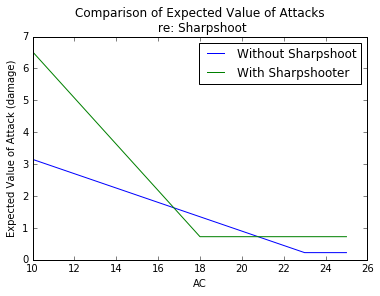

In [51]:
plt.plot(ACs, e_no_sharpshooter, label = "Without Sharpshoot")
plt.plot(ACs, e_with_sharpshooter, label = "With Sharpshooter")
plt.legend()
plt.title("Comparison of Expected Value of Attacks\n re: Sharpshoot")
plt.xlabel("AC")
plt.ylabel("Expected Value of Attack (damage)")

Seems like Sharpshooter, assuming just the basic proficiency and the archery bonus, is totally worth it unless 17 < AC < 21 (so AC of 18, 19, or 20). The bonus is _massive_ at lower ACs which makes sense since you're likely to hit those targets by a wide margin to begin with so the attack penalty isn't an issue.  We again see the issue of damage bonuses being better once the target is hopelessly difficult to hit, but in this case the damage boost is so massive that it's amuch bigger difference than before.

Again, there are more analyses to be done: this doesn't take into account bonuses from proficiency increase or items or advantage, but it's a good start.  We're not the World Bank here, we don't need a year's worth of rigor.

But wait!  What if, instead of taking Sharpshooter the ranger added +2 to his Dexterity, adding an addition +1 to his attack rolls?

In [52]:
e_no_sharpshooter = []
e_with_sharpshooter = []
for AC in ACs:
    #Attack bonuses: +2 proficiency bonus (the minimum), +2 bonus from archery specialization, and +1 from increased Dex
    #(because that's what my ranger is)
    #No damage bonus
    e_no_sharpshooter.append(prHit(2+2+1, AC) * 4.5)
    #Attack bonuses: +2 proficiency bonus (the minimum) and +2 bonus from archery specialization
    #and -5 from the Sharpshooter option
    #Damage bonus: +10 from the Sharpshooter option specialization
    e_with_sharpshooter.append(prHit(2+2-5, AC) * (4.5 + 10))


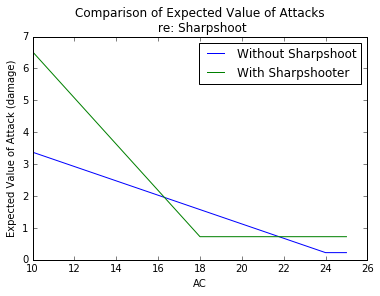

In [53]:
plt.plot(ACs, e_no_sharpshooter, label = "Without Sharpshoot")
plt.plot(ACs, e_with_sharpshooter, label = "With Sharpshooter")
plt.legend()
plt.title("Comparison of Expected Value of Attacks\n re: Sharpshoot")
plt.xlabel("AC")
plt.ylabel("Expected Value of Attack (damage)")

As expected, Sharpshooter becomes less significant.  It's now only useful at AC<16 and AC>22.  It could be ok, there are actually lots of monsters and NPCs that have AC<16, so maybe not a bad deal.  It might be worth more depending on how valuable it is to ignore cover, but cover hasn't come up much so far in our campaign, at least for the bad guys.

So the bottom line: Damage bonus is better than Attack bonus at low and high ACs.  Sharpshooter is better at low and high ACs but not better enough to justify sacrificing +2 to a stat to get it.

# BELOW THIS LINE IS UNFINISHED.  DO NOT CROSS

### Data
I acquired a dataset of (I think) all the monsters in the 5th edition Monster Manual with some key stats (thanks to /u/Endomorphism002).  The stats I'm most interested in, however, are Challenge Rating (so see how difficult a monster is supposed to be to kill) and Armor Class (to see how difficult a monster is to hit).  We load that here.

From the Dungeon Master's Basic Rules p.5:


> A monster’s challenge rating tells you how great a
threat the monster is. An appropriately equipped and
well-rested party of four adventurers should be able to
defeat a monster that has a challenge rating equal to its
level without suffering any deaths. For example, a party
of four 3rd-level characters should find a monster with
a challenge rating of 3 to be a worthy challenge, but not
a deadly one.

In [7]:
%matplotlib inline
import pandas as pd, numpy as np

In [112]:
monsterStats = pd.read_csv("5eMonsters.csv")

In [113]:
monsterStats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 427
Data columns (total 10 columns):
name    428 non-null object
type    428 non-null object
aln     428 non-null object
ac      428 non-null int64
hp      428 non-null int64
spc     428 non-null object
at1     423 non-null object
at2     216 non-null object
p       428 non-null int64
crd     428 non-null float64
dtypes: float64(1), int64(3), object(6)
memory usage: 36.8+ KB


428 entries.  Tangentially, it's impressive how many distinct monsters WotC packs into the MM, even after you account for the 40 entries consisting of the cross product of Dragon**x**[Color]**x**[Age] and the 28 "giant" varieties of a bunch of mundane animals.

In [114]:
monsterStats[['name','ac', 'crd']][:12]

,name,ac,crd
0,Aarakocra,12,0.25
1,Aboleth,17,10.00
2,Abominable Yeti,15,9.00
3,Acolyte,10,0.25
4,Air Elemental,15,5.00
5,Allosaurus,13,2.00
6,Androsphinx,17,17.00
7,Animated Armor,18,1.00
8,Ankheg,14,2.00
9,Ankylosaurus,15,3.00


Let's look at how they're distributed by challenge rating.

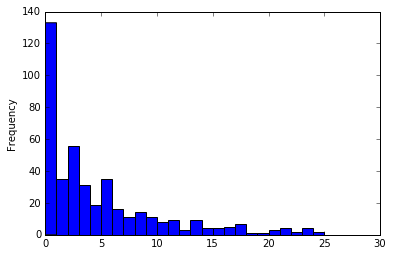

In [115]:
monsterStats['crd'].plot(kind='hist', bins = np.arange(0,max(monsterStats['crd']), 1))

Lots of monsters with CR zero.  How can that be?  It turns out there are a lot of kind of offal creatures that are listed just in case it comes up, like beetles, swarms of flies, etc. Some of them even have fractional CRs.

In [117]:
monsterStats[['name','crd','ac']].sort_values(['crd'])[:20]

,name,crd,ac
94,Deer,0,13
348,Shrieker,0,5
342,Sea Horse,0,11
339,Scorpion,0,11
210,Hawk,0,13
27,Bat,0,12
317,Raven,0,12
316,Rat,0,10
314,Quipper,0,13
219,Homunculus,0,13


As a player, I'm much less concerned with fighting seahorses, so let's remove all the monsters with CR less than 1 and work with that from now on.

In [118]:
monsterStats = monsterStats[monsterStats['crd'] >= 1]

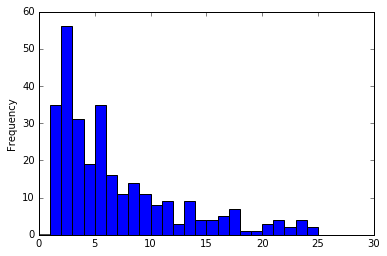

In [119]:
monsterStats['crd'].plot(kind='hist', bins = np.arange(0,max(monsterStats['crd']), 1))

That's better.  It's hard to see the lone entry at CR 30, but it's there: the good old Terrasque.  He's definitely an outlier, but I can't bring myself to remove him just yet.  Maybe if he throws off a regression later or something.  Has anyone ever had to fight the terrasque in a campaign?  Like actually fight it, not as part of a story or a scene or whatever?  You can kill it in 5e, it's not immortal anymore.

Let's look at how many monsters there are with each armor class.  

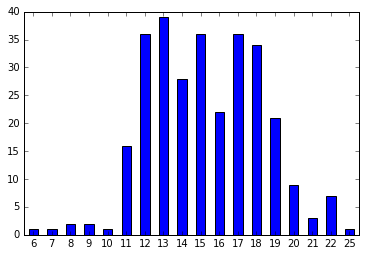

In [120]:
monsterStats['ac'].value_counts().sort_index(0).plot(kind='bar', rot=0)

Pretty stark block of ACs in the 12-19 range.  Including the fluff monsters shows a much more normal curve, though.

There are a couple of ways we can link AC and CR.  Let's start by seeing what the average AC is for each CR.

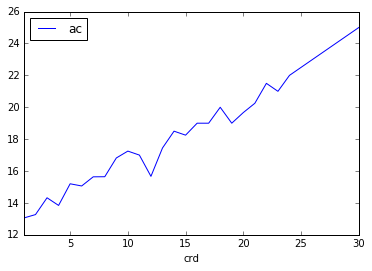

In [122]:
monsterStats[['crd','ac']].groupby(['crd']).mean().plot(rot=0)

Pretty linear progression.  Later we'll fit a regression to this: I expect it'll be something like $ \hat{y} = 13.5 + 1crd$

We can relate the two in a scatterplot to get a better sense of the distribution, too.

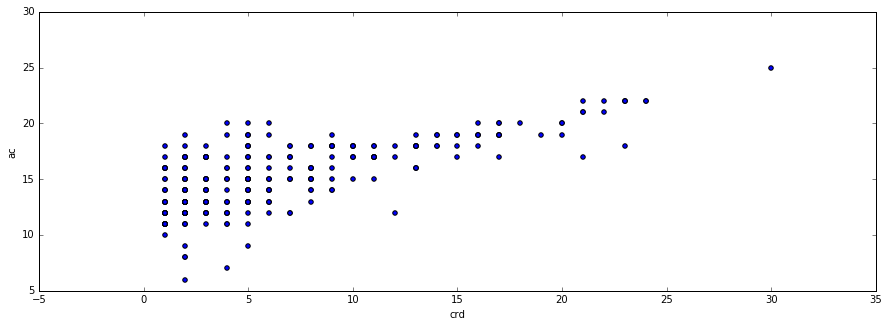

In [123]:
monsterStats.plot(kind="scatter", x='crd',y='ac', figsize=[15,5])

This gives us a better idea.  The variance of AC is much higher at lower CRs; as CR increases the ACs are much more consistent.  This, from a gameplay perspective, is because at higher levels mosnters have other ways of being dangerous besides being harder to hit.  At low levels the monsters can't be too deadly with abilities because they'll just murder the party, so to differentiate monsters the base stats are more different.

The problem here is that if more than one monster have the same (cr, ac) combo they'll plot on top of one another, so this isn't a great representation of the density of stats.  Next we'll plot the density of the combinations of stats.

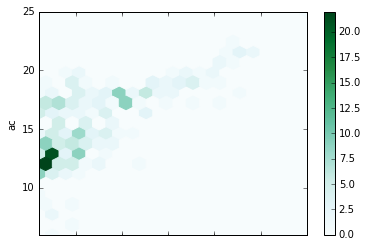

In [125]:
monsterStats.plot(kind="hexbin", x='crd',y='ac', gridsize=20)

This shows us the absolute density of (cr, ac) pairs.  This makes it clear that at levels 1-3 most of the monsters have AC betwen 11 and 14.